<a href="https://colab.research.google.com/github/sud0x00/Image-Similarity/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreReq

In [ ]:
!mkdir images
%cd images
!wget https://storage.googleapis.com/lun-ua/images/892325437.jpg
!wget https://storage.googleapis.com/lun-ua/images/965564035.jpg
!wget https://storage.googleapis.com/lun-ua/images/965225293.jpg

/content/images/images/images
--2023-07-07 07:20:36--  https://storage.googleapis.com/lun-ua/images/892325437.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25057 (24K) [image/jpeg]
Saving to: ‘892325437.jpg’

892325437.jpg       100%[===================>]  24.47K  --.-KB/s    in 0.03s   

2023-07-07 07:20:38 (827 KB/s) - ‘892325437.jpg’ saved [25057/25057]

--2023-07-07 07:20:38--  https://storage.googleapis.com/lun-ua/images/965564035.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29899 (29K) [image/jpeg]
Saving to: ‘965564035.jpg’

965564035.jpg  

# Tests


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# surf = cv.xfeatures2d.SURF_create(400)

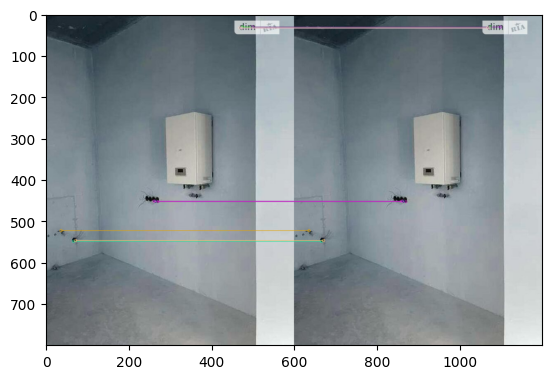

(<matplotlib.image.AxesImage at 0x7f7189c88ca0>, None)

In [ ]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/images/965564035.jpg',cv2.COLOR_BGR2GRAY) # queryImage
img2 = cv2.imread('/content/images/965225293.jpg',cv2.COLOR_BGR2GRAY) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.  (img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()

In [ ]:
import cv2 as cv
MAX_FEATURES = 5500
GOOD_MATCH_PERCENT = 0.03

def find_matches(im1, im2):
    # Convert images to grayscale
    im1Gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
    im2Gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

    detector = cv.SIFT_create(MAX_FEATURES)
    descriptor = cv.SIFT_create(MAX_FEATURES)

    keypoints1 = detector.detect(im1Gray, None)
    keypoints2 = detector.detect(im2Gray, None)

    # find descriptors with descriptor SIFT
    keypoints1, descriptors1 = descriptor.compute(im1Gray, keypoints1)
    keypoints2, descriptors2 = descriptor.compute(im2Gray, keypoints2)

    # BFMatcher object
    matcher = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = list(matcher.match(descriptors1, descriptors2))

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)
    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv.drawMatches(
        im1, keypoints1, im2, keypoints2, matches, None)
    cv.imwrite("matches.jpg", imMatches)

In [ ]:
find_matches(img1,img2)

# Main Program

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tkinter.filedialog import askopenfilename

im1 = cv2.imread('/content/images/965564035.jpg',cv2.COLOR_BGR2GRAY)
im2 = cv2.imread('/content/images/965225293.jpg',cv2.COLOR_BGR2GRAY)
im_2 = cv2.imread('/content/images/892325437.jpg',cv2.COLOR_BGR2GRAY)


def similarity(img1,img2):
  # Initiate SURF detector
  # surf=cv2.xfeatures2d.SURF_create()
  sift=cv2.xfeatures2d.SIFT_create()

  # find the keypoints and descriptors with SURF
  # kp1, des1 = surf.detectAndCompute(img1,None)
  # kp2, des2 = surf.detectAndCompute(img2,None)
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)

  # BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)

  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
          a=len(good)
          percent=(a*100)/len(kp2)
          print("{} % similarity".format(percent))
          if percent >= 75.00:
              print('Match Found')
          if percent < 75.00:
              print('Match not Found')

  img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
  plt.imshow(img3),plt.show()

0.4784688995215311 % similarity
Match not Found
0.9569377990430622 % similarity
Match not Found
1.4354066985645932 % similarity
Match not Found
1.9138755980861244 % similarity
Match not Found
2.3923444976076556 % similarity
Match not Found
2.8708133971291865 % similarity
Match not Found
3.349282296650718 % similarity
Match not Found
3.827751196172249 % similarity
Match not Found
4.30622009569378 % similarity
Match not Found
4.784688995215311 % similarity
Match not Found
5.2631578947368425 % similarity
Match not Found
5.741626794258373 % similarity
Match not Found
6.220095693779904 % similarity
Match not Found
6.698564593301436 % similarity
Match not Found
7.177033492822966 % similarity
Match not Found
7.655502392344498 % similarity
Match not Found
8.133971291866029 % similarity
Match not Found
8.61244019138756 % similarity
Match not Found
9.090909090909092 % similarity
Match not Found
9.569377990430622 % similarity
Match not Found
10.047846889952153 % similarity
Match not Found
10.5263

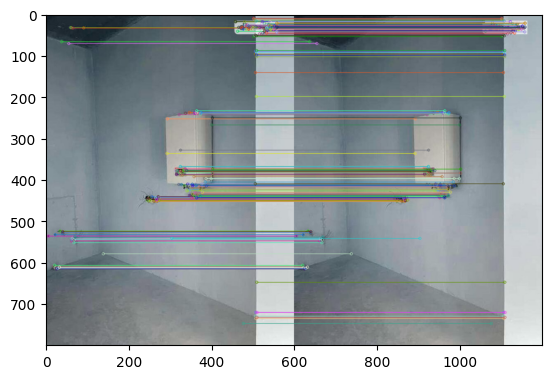

In [ ]:
similarity(im1,im2)

0.5 % similarity
Match not Found
1.0 % similarity
Match not Found
1.5 % similarity
Match not Found
2.0 % similarity
Match not Found
2.5 % similarity
Match not Found
3.0 % similarity
Match not Found
3.5 % similarity
Match not Found
4.0 % similarity
Match not Found
4.5 % similarity
Match not Found
5.0 % similarity
Match not Found
5.5 % similarity
Match not Found
6.0 % similarity
Match not Found
6.5 % similarity
Match not Found
7.0 % similarity
Match not Found
7.5 % similarity
Match not Found
8.0 % similarity
Match not Found
8.5 % similarity
Match not Found
9.0 % similarity
Match not Found
9.5 % similarity
Match not Found
10.0 % similarity
Match not Found
10.5 % similarity
Match not Found
11.0 % similarity
Match not Found
11.5 % similarity
Match not Found
12.0 % similarity
Match not Found
12.5 % similarity
Match not Found
13.0 % similarity
Match not Found
13.5 % similarity
Match not Found
14.0 % similarity
Match not Found
14.5 % similarity
Match not Found
15.0 % similarity
Match not Found

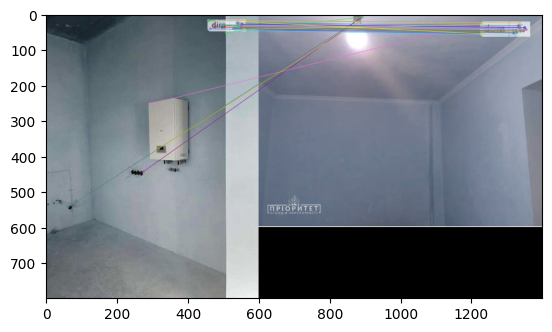

In [ ]:
similarity(im1,im_2)